In [1]:
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

import sys
sys.path.append('..')
from utils.lr_scheduler import plot_lr_schedule, get_cosine_schedule_with_warmup, get_lr_range_test_scheduler

In [2]:
lr = 3e-5 * 32
epoch = 157
num_steps = epoch * 31

In [3]:
dummy_param = torch.nn.Parameter(torch.randn(1))
dummy_optimizer = optim.SGD([dummy_param], lr=lr) 

/home/xycoord/Code/Transparency_Estimation/Transparency-Estimation/.venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


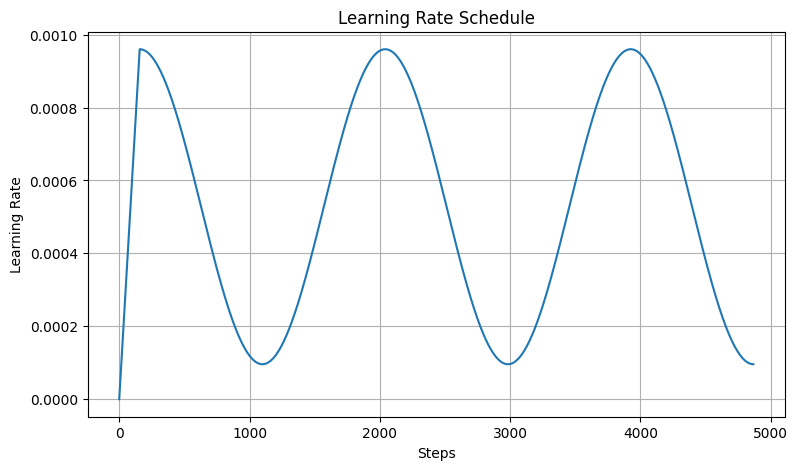

In [4]:
lr_scheduler= get_cosine_schedule_with_warmup(
    optimizer=dummy_optimizer,
    num_warmup_steps=epoch,
    num_training_steps=num_steps,
    num_cycles=2.5,
    min_lr_ratio=0.1
)
plot_lr_schedule(lr_scheduler, num_steps=num_steps, accelerator=None)

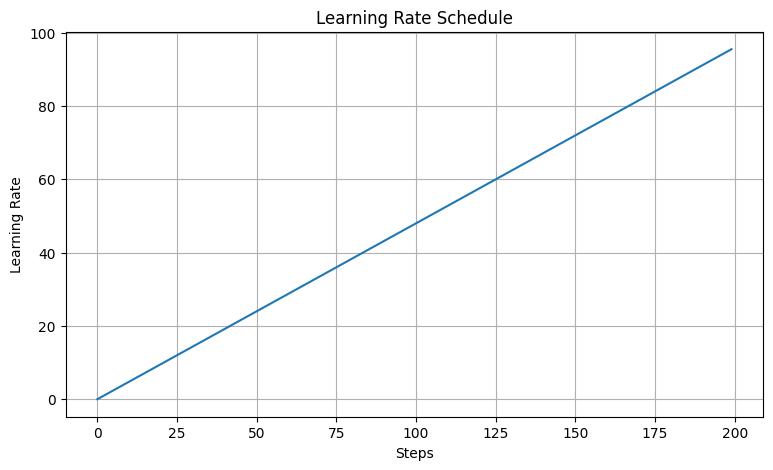

In [5]:
# Create the scheduler for range test from 1e-7 to 1e-2 over 4 epochs
scheduler = get_lr_range_test_scheduler(
    optimizer=dummy_optimizer,
    initial_lr=1e-7,
    final_lr=1e-2,
    total_iters=200 
)

plot_lr_schedule(scheduler, num_steps=200)